In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Font

In [2]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

#### Import Data

In [3]:
Bias_Records = pd.read_stata("../regressions/final_patent_citation_data.dta")

In [4]:
Bias_Records.columns

Index([u'year', u'gvkey', u'number_of_citation_o', u'number_of_patent_o',
       u'mode_state_year', u'mode_class_year', u'f_year_fe_patent_o',
       u'f_year_fe_citation_o', u'f_year_class_fe_patent_o',
       u'f_year_class_fe_citation_o', u'citation_cit_o', u'citation_pro_o',
       u'f_year_fe_corp_patent_o', u'f_year_fe_corp_citation_o',
       u'f_year_class_fe_corp_patent_o', u'f_year_class_fe_corp_citation_o',
       u'number_of_citation_n', u'number_of_patent_n', u'f_year_fe_patent_n',
       u'f_year_fe_citation_n', u'f_year_class_fe_patent_n',
       u'f_year_class_fe_citation_n', u'citation_cit_n', u'citation_pro_n',
       u'f_year_fe_corp_patent_n', u'f_year_fe_corp_citation_n',
       u'f_year_class_fe_corp_patent_n', u'f_year_class_fe_corp_citation_n'],
      dtype='object')

In [5]:
Bias_Records["#patents_bias"] = Bias_Records["number_of_patent_o"]-Bias_Records["number_of_patent_n"]
Bias_Records["#citings_bias"] = Bias_Records["number_of_citation_o"]-Bias_Records["number_of_citation_n"]
Bias_Records["fyr#patents_bias"] = Bias_Records["f_year_fe_patent_o"]-Bias_Records["f_year_fe_patent_n"]
Bias_Records["fyr#citings_bias"] = Bias_Records["f_year_fe_citation_o"]-Bias_Records["f_year_fe_citation_n"]
Bias_Records["fyrfd#patents_bias"] = Bias_Records["f_year_class_fe_patent_o"]-Bias_Records["f_year_class_fe_patent_n"]
Bias_Records["fyrfd#citings_bias"] = Bias_Records["f_year_class_fe_citation_o"]-Bias_Records["f_year_class_fe_citation_n"]

Bias_Records["citing_ce_bias"] = (Bias_Records["citation_cit_o"]-Bias_Records["citation_cit_n"])/10
Bias_Records["citing_pc_bias"] = (Bias_Records["citation_pro_o"]-Bias_Records["citation_pro_n"])/10

Bias_Records["fyrf#patents_bias"] = Bias_Records["f_year_fe_corp_patent_o"]-Bias_Records["f_year_fe_corp_patent_n"]
Bias_Records["fyrf#citings_bias"] = Bias_Records["f_year_fe_corp_citation_o"]-Bias_Records["f_year_fe_corp_citation_n"]
Bias_Records["fyrfdf#patents_bias"] = Bias_Records["f_year_class_fe_corp_patent_o"]-Bias_Records["f_year_class_fe_corp_patent_n"]
Bias_Records["fyrfdf#citings_bias"] = Bias_Records["f_year_class_fe_corp_citation_o"]-Bias_Records["f_year_class_fe_corp_citation_n"]

### Tables in main paper

#### Figure 8A: Distribution of Firm Patent Bias

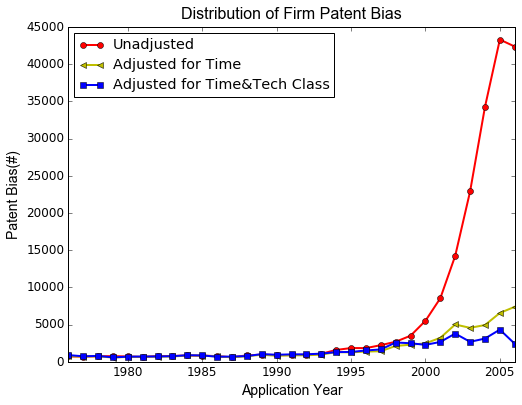

In [6]:
temp = Bias_Records[["year","#patents_bias","fyr#patents_bias","fyrfd#patents_bias"]].groupby(["year"]).sum()

ax = temp.plot(style=["ro-","y<-","bs-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.legend(["Unadjusted", "Adjusted for Time", "Adjusted for Time&Tech Class"], loc=0)
plt.title("Distribution of Firm Patent Bias", **title_font)
plt.rc('font', **font)
fig = ax.get_figure()
fig.savefig("Distribution of Firm Patent Bias"+".png")

#### Figure 8B: Distribution of Firm Citation Bias

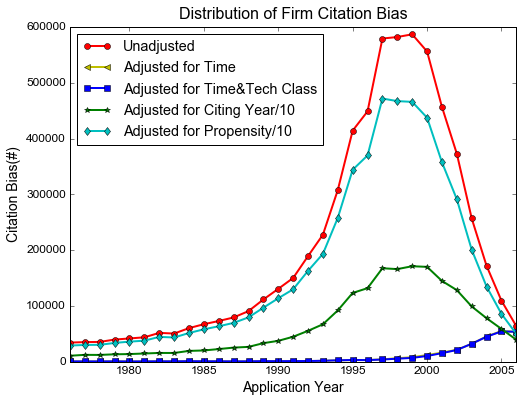

In [7]:
temp = Bias_Records[["year","#citings_bias","fyr#citings_bias","fyrfd#citings_bias","citing_ce_bias","citing_pc_bias"]].groupby("year").sum()

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Unadjusted", 
            "Adjusted for Time", "Adjusted for Time&Tech Class",
            "Adjusted for Citing Year/10", "Adjusted for Propensity/10"], loc=0)
plt.title("Distribution of Firm Citation Bias", **title_font)
plt.rc('font', **font)
fig = ax.get_figure()
fig.savefig("Distribution of Firm Citation Bias"+".png")

#### Figure 9A: Firm Patent Bias (Unadjusted and Adjusted) across Time

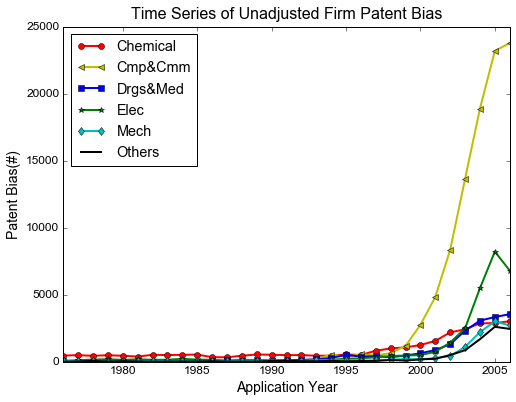

In [8]:
temp = Bias_Records[["year", "mode_class_year", "#patents_bias"]].pivot_table(index="year", columns="mode_class_year", values="#patents_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Unadjusted Firm Patent Bias", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Unadjusted Firm Patent Bias"+".png")

#### Figure 9B: Firm Patent Bias (Unadjusted and Adjusted) across Time

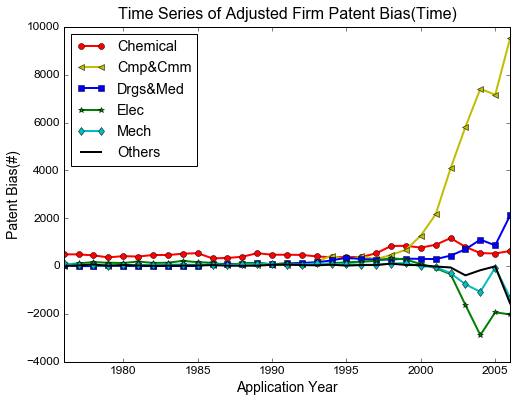

In [9]:
temp = Bias_Records[["year", "mode_class_year", "fyr#patents_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyr#patents_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Patent Bias(Time)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Patent Bias(Time)"+".png")

#### Figure 9C: Firm Patent Bias (Unadjusted and Adjusted) across Time

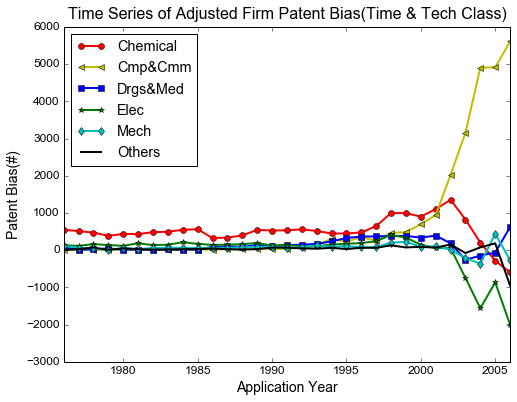

In [10]:
temp = Bias_Records[["year", "mode_class_year", "fyrfd#patents_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyrfd#patents_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Patent Bias(Time & Tech Class)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Patent Bias(Time & Tech Class)"+".png")

#### Figure 10A: Firm Citation bias (Unadjusted and Adjusted) across different Technology Classes

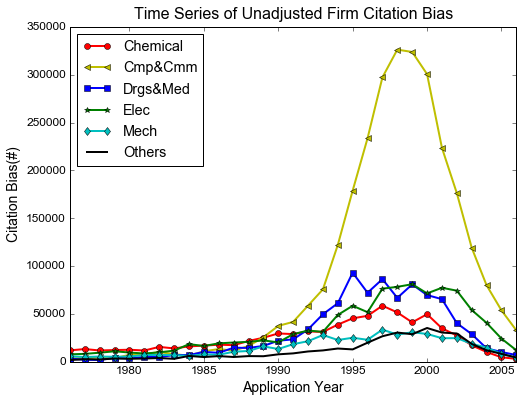

In [11]:
temp = Bias_Records[["year", "mode_class_year", "#citings_bias"]].pivot_table(index="year", columns="mode_class_year", values="#citings_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Unadjusted Firm Citation Bias", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Unadjusted Firm Citation Bias"+".png")

#### Figure 10B: Firm Citation bias (Unadjusted and Adjusted) across different Technology Classes

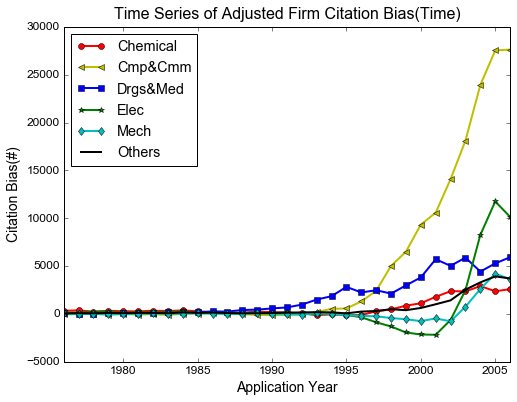

In [12]:
temp = Bias_Records[["year", "mode_class_year", "fyr#citings_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyr#citings_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Time)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Time)"+".png")

#### Figure 10C: Firm Citation bias (Unadjusted and Adjusted) across different Technology Classes

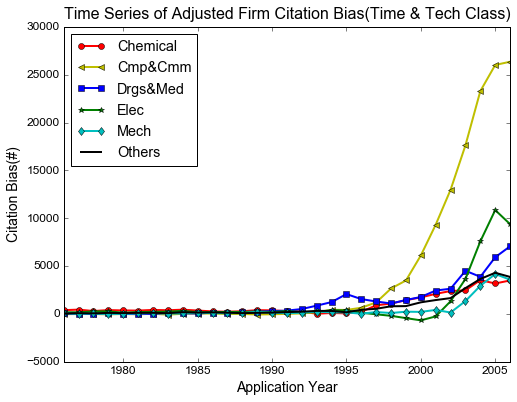

In [13]:
temp = Bias_Records[["year", "mode_class_year", "fyrfd#citings_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyrfd#citings_bias", aggfunc='sum').fillna(0)
ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Time & Tech Class)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Time & Tech Class)"+".png")

#### Figure 10D: Firm Citation bias (Unadjusted and Adjusted) across different Technology Classes

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


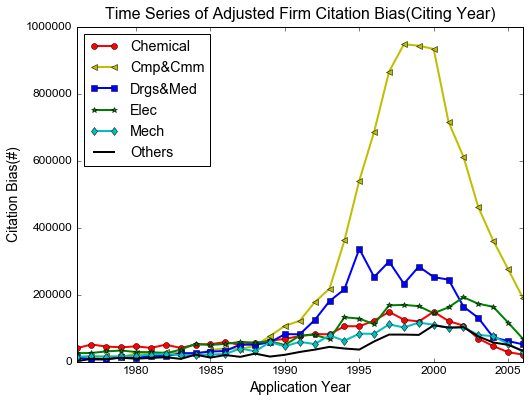

In [14]:
temp = Bias_Records[["year", "mode_class_year", "citing_ce_bias"]]
temp.citing_ce_bias = temp.citing_ce_bias*10
temp = temp[["year", "mode_class_year", "citing_ce_bias"]].pivot_table(index="year", columns="mode_class_year", values="citing_ce_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Citing Year)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Citing Year)"+".png")

#### Figure 10E: Firm Citation bias (Unadjusted and Adjusted) across different Technology Classes

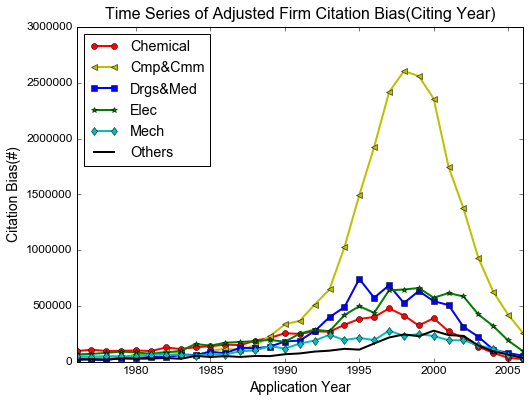

In [15]:
temp = Bias_Records[["year", "mode_class_year", "citing_pc_bias"]]
temp.citing_pc_bias = temp.citing_pc_bias*10
temp = temp[["year", "mode_class_year", "citing_pc_bias"]].pivot_table(index="year", columns="mode_class_year", values="citing_pc_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Citing Year)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Citing Year)"+".png")

In [16]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
x_font = {'fontname':'Arial', 'size':'13'}

In [17]:
mystate=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY']

#### Figure 11A: Firm Patents bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


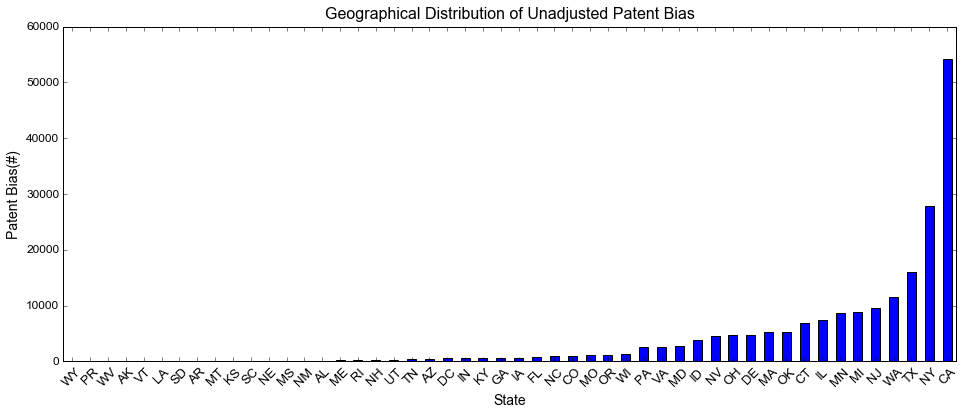

In [18]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "#patents_bias"]].groupby(["mode_state_year"]).sum().sort("#patents_bias")
ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.title("Geographical Distribution of Unadjusted Patent Bias", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Unadjusted Patent Bias"+".png")


#### Figure 11B: Firm Patents bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


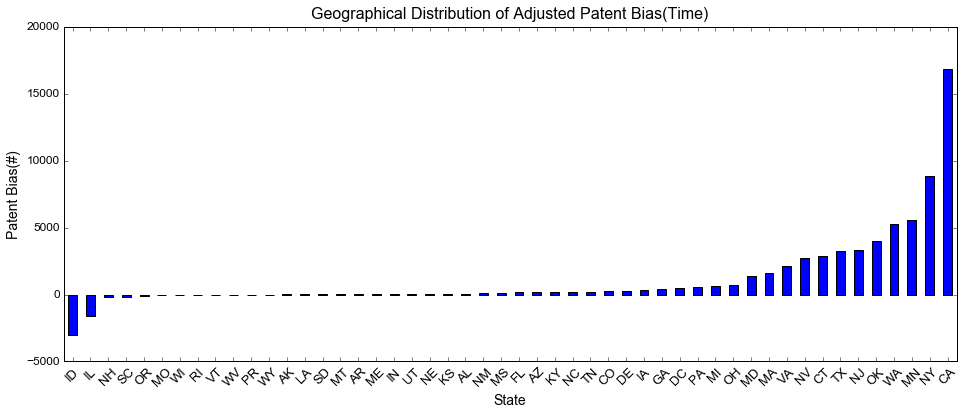

In [19]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "fyr#patents_bias"]].groupby(["mode_state_year"]).sum().sort("fyr#patents_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Patent Bias(Time)", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Patent Bias(Time)"+".png")


#### Figure 11C: Firm Patents bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


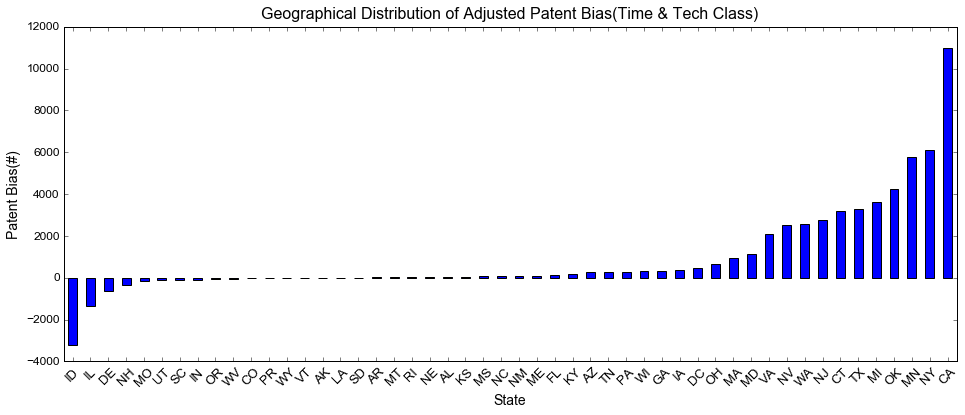

In [20]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "fyrfd#patents_bias"]].groupby(["mode_state_year"]).sum().sort("fyrfd#patents_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Patent Bias(Time & Tech Class)", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Patent Bias(Time & Tech Class)"+".png")

#### Figure 12A: Firm Citation Bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


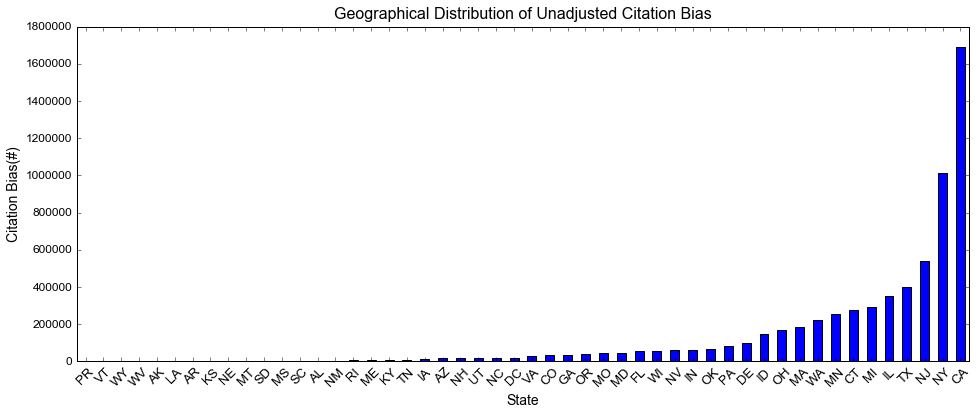

In [21]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "#citings_bias"]].groupby(["mode_state_year"]).sum().sort("#citings_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.title("Geographical Distribution of Unadjusted Citation Bias", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Unadjusted Citation Bias"+".png")


#### Figure 12B: Firm Citation Bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


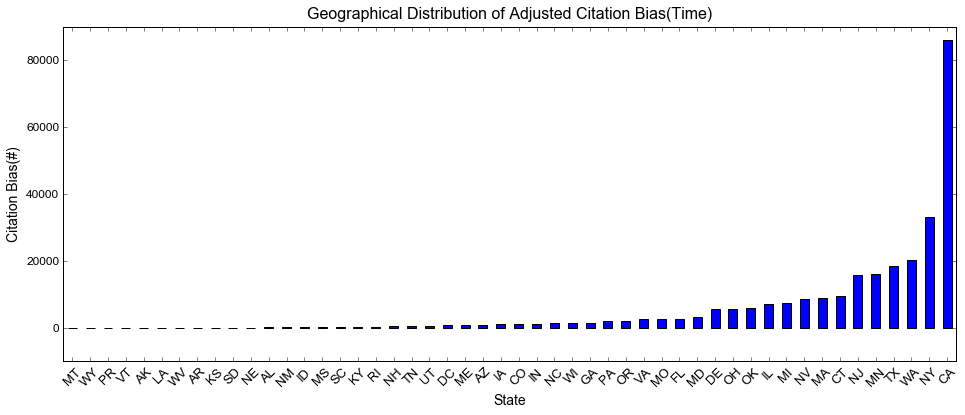

In [22]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "fyr#citings_bias"]].groupby(["mode_state_year"]).sum().sort("fyr#citings_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Citation Bias(Time)", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Citation Bias(Time)"+".png")


#### Figure 12C: Firm Citation Bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


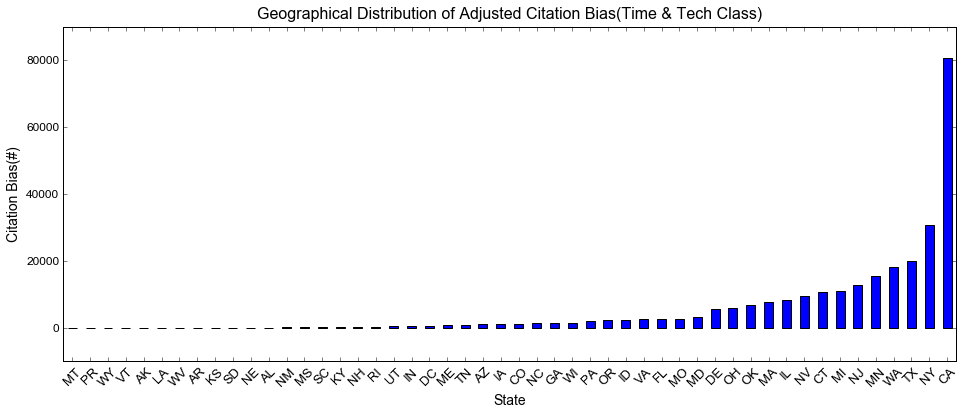

In [23]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "fyrfd#citings_bias"]].groupby(["mode_state_year"]).sum().sort("fyrfd#citings_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Citation Bias(Time & Tech Class)", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Citation Bias(Time & Tech Class)"+".png")


#### Figure 12D: Firm Citation Bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


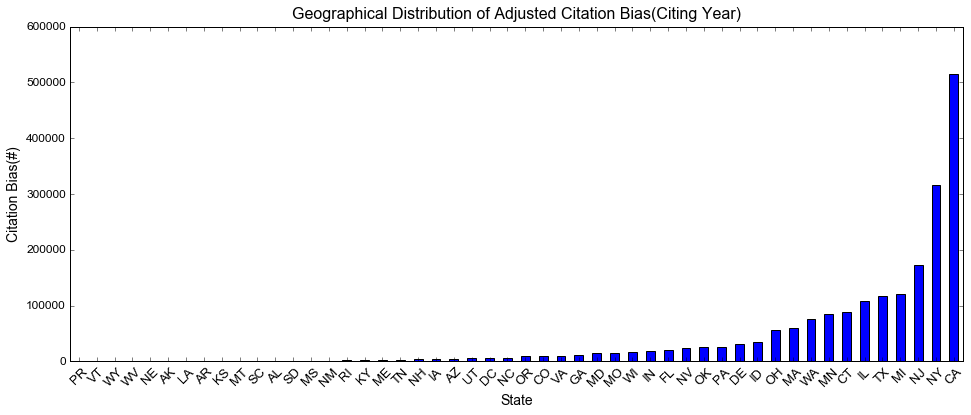

In [24]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "citing_ce_bias"]].groupby(["mode_state_year"]).sum().sort("citing_ce_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Citation Bias(Citing Year)", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Citation Bias(Citing Year)"+".png")

#### Figure 12E: Firm Citation Bias (Unadjusted and Adjusted) across Regions

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


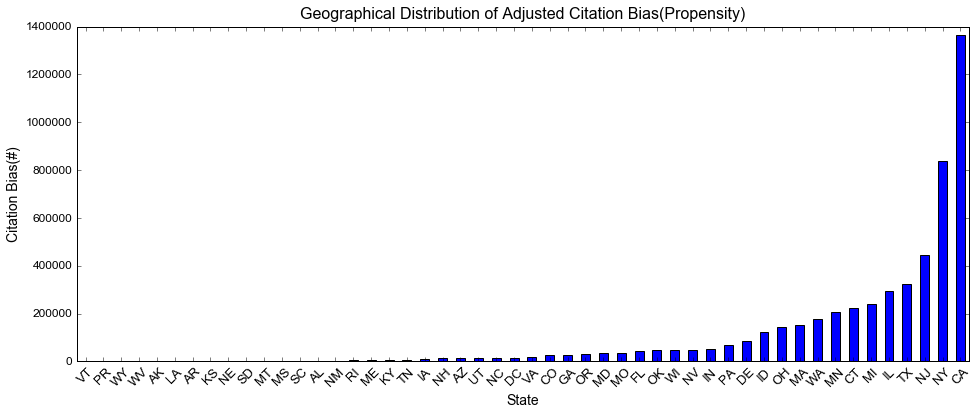

In [25]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "citing_pc_bias"]].groupby(["mode_state_year"]).sum().sort("citing_pc_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Citation Bias(Propensity)", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Citation Bias(Propensity)"+".png")


In [26]:
Firm_Character = pd.read_stata("../regressions/firm_characters.dta")

In [27]:
patent_firm = pd.merge(Bias_Records, Firm_Character, how="left", on=["gvkey","year"])

In [28]:
patent_firm["sic"] = patent_firm.sicc.apply(lambda x: int(str(x[:2])) if x!="" else np.nan)
patent_firm["naics"] = patent_firm.naicsc.apply(lambda x: int(str(x[:2])) if x!="" else np.nan)

#### Figure 13A: Firm Patent Bias (Unadjusted and Adjusted) across Industries (NAICS)

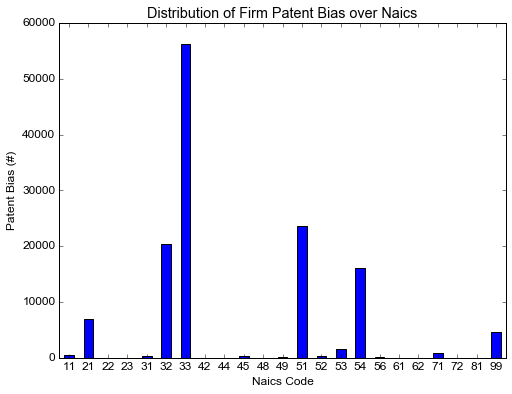

In [29]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","#patents_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Patent Bias over Naics")
plt.xlabel("Naics Code")
plt.ylabel("Patent Bias (#)")
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Patent Bias over Naics"+".png")

#### Figure 13B: Firm Patent Bias (Unadjusted and Adjusted) across Industries (NAICS)

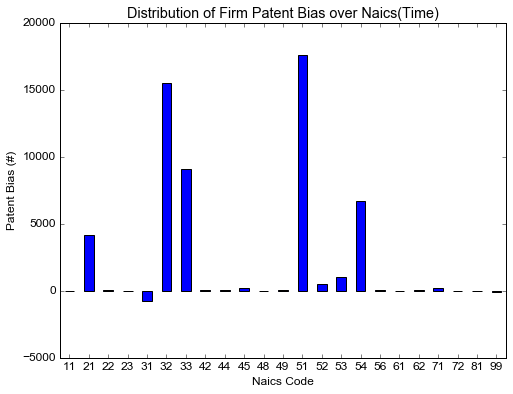

In [30]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","fyr#patents_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Patent Bias over Naics(Time)")
plt.xlabel("Naics Code")
plt.ylabel("Patent Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Patent Bias over Naics(Time)"+".png")

#### Figure 13C: Firm Patent Bias (Unadjusted and Adjusted) across Industries (NAICS)

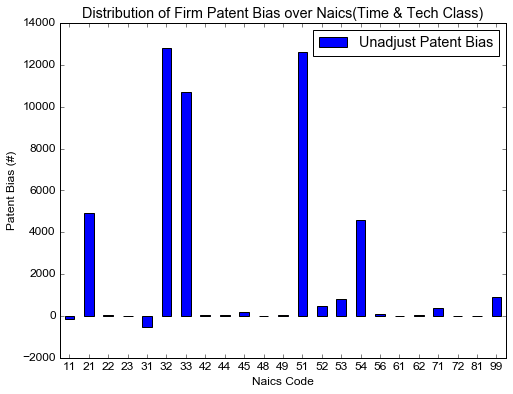

In [31]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","fyrfd#patents_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Patent Bias over Naics(Time & Tech Class)")
plt.xlabel("Naics Code")
plt.ylabel("Patent Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
fig.savefig("Distribution of Firm Patent Bias over Naics(Time & Tech Class)"+".png")

#### Figure 14A: Firm Citation Bias (Unadjusted and Adjusted) across Industries (NAICS)

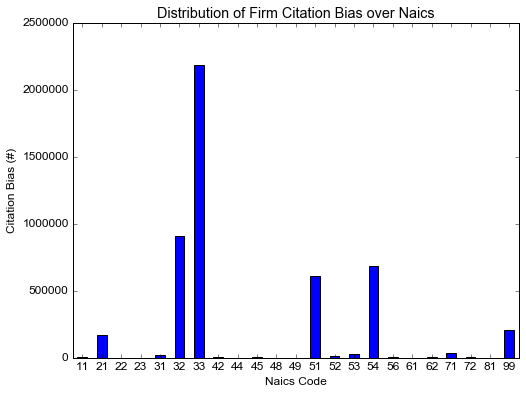

In [32]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","#citings_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias over Naics")
plt.xlabel("Naics Code")
plt.ylabel("Citation Bias (#)")
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias over Naics"+".png")

#### Figure 14B: Firm Citation Bias (Unadjusted and Adjusted) across Industries (NAICS)

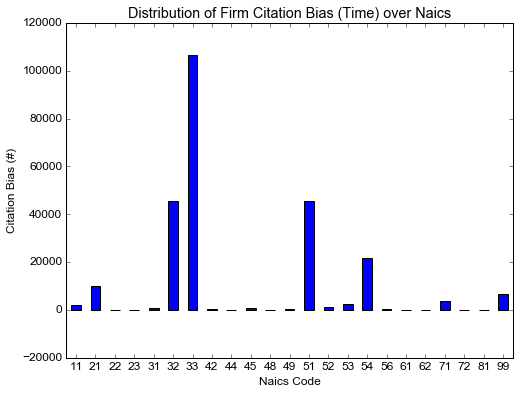

In [33]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","fyr#citings_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias (Time) over Naics")
plt.xlabel("Naics Code")
plt.ylabel("Citation Bias (#)")
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias (Time) over Naics"+".png")

#### Figure 14C: Firm Citation Bias (Unadjusted and Adjusted) across Industries (NAICS)

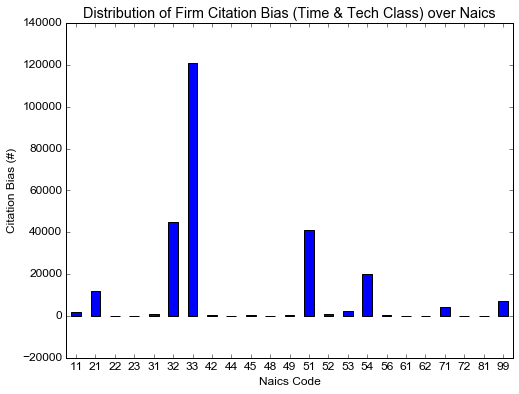

In [34]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","fyrfd#citings_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias (Time & Tech Class) over Naics")
plt.xlabel("Naics Code")
plt.ylabel("Citation Bias (#)")
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias (Time & Tech Class) over Naics"+".png")

#### Figure 14D: Firm Citation Bias (Unadjusted and Adjusted) across Industries (NAICS)

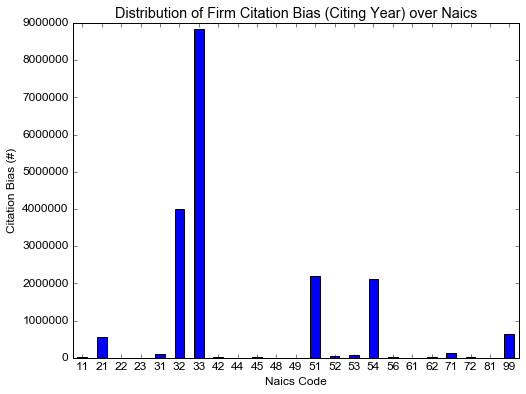

In [35]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","citing_ce_bias"]].drop_duplicates()
firm_class1.citing_ce_bias = firm_class1.citing_ce_bias*10
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias (Citing Year) over Naics")
plt.xlabel("Naics Code")
plt.ylabel("Citation Bias (#)")
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias (Citing year) over Naics"+".png")

#### Figure 14E: Firm Citation Bias (Unadjusted and Adjusted) across Industries (NAICS)

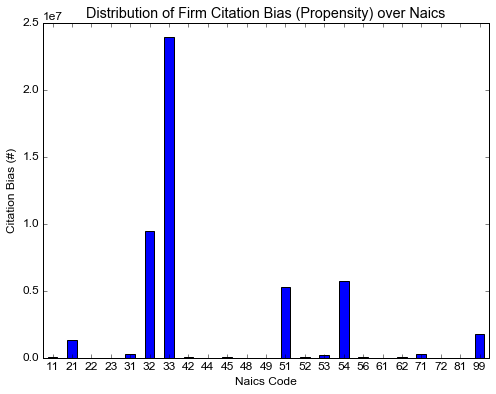

In [36]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","citing_pc_bias"]].drop_duplicates()
firm_class1.citing_pc_bias = firm_class1.citing_pc_bias*10
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias (Propensity) over Naics")
plt.xlabel("Naics Code")
plt.ylabel("Citation Bias (#)")
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias (Propensity) over Naics"+".png")

### Appendix Figure (referenced in a footnote): Patent Application and Average Citations

In [37]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

In [38]:
our_assignee = pd.read_stata("../our data/Ourdata_US_public_firm_assignee.dta")
our_class = pd.read_stata("../our data/3930271_8341762_class.dta")

In [39]:
temp = pd.merge(our_assignee, our_class, how="left", on="wku").dropna()
temp = temp[["wku","filed_year","cat_code"]].drop_duplicates().groupby(["filed_year","cat_code"], as_index=False).count()
temp = temp[temp.filed_year>=1976].pivot_table(index="filed_year", columns = "cat_code", values="wku")

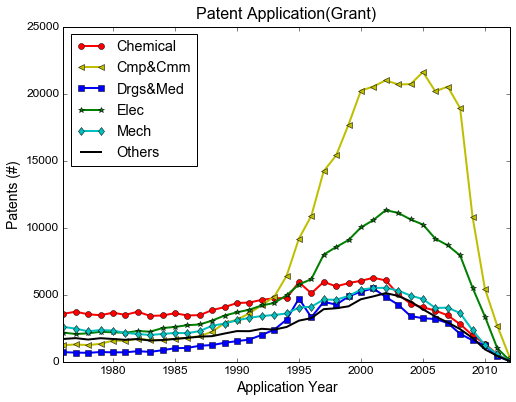

In [40]:
ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patents (#)", **axis_font)
plt.legend(["Chemical", "Cmp&Cmm", "Drgs&Med", "Elec", "Mech", "Others"], loc=0)
plt.title("Patent Application(Grant)", **title_font)
fig = ax.get_figure()
fig.savefig("Patent Application(Grant)"+".png")

In [41]:
our_assignee = pd.read_stata("../our data/Ourdata_US_public_firm_assignee.dta")
our_class = pd.read_stata("../our data/3930271_8341762_class.dta")
our_citation = pd.read_stata("../our data/3930271_8341762_citations.dta")

In [42]:
temp = pd.merge(our_assignee, our_class, how="left", on="wku").dropna()
our_patent = temp[["filed_year","cat_code","wku"]].drop_duplicates().groupby(["filed_year","cat_code"], as_index=False).count()

In [43]:
temp = pd.merge(our_assignee, our_class, how="left", on="wku").dropna()
temp = temp[["filed_year","cat_code","wku"]].drop_duplicates()
temp = pd.merge(temp, our_citation, how="left", on="wku").dropna()
our_citation = temp[["wku","filed_year","cat_code","citing"]].drop_duplicates().groupby(["filed_year","cat_code"], as_index=False).count()

In [44]:
temp = pd.merge(our_patent, our_citation[["filed_year","cat_code","citing"]], how="left", on=["filed_year","cat_code"])
temp["average_cite"] = temp.citing/temp.wku

In [45]:
temp = temp[temp.filed_year>=1976].pivot_table(index="filed_year", columns = "cat_code", values="average_cite")

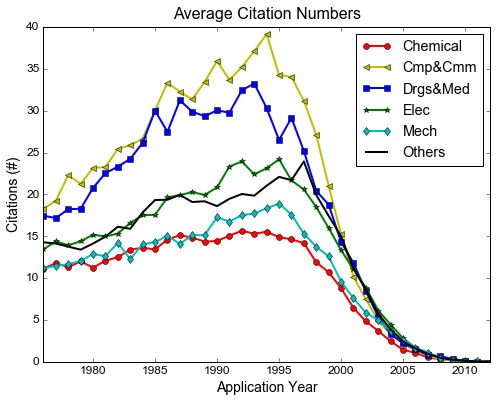

In [46]:
ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citations (#)", **axis_font)
plt.legend(["Chemical", "Cmp&Cmm", "Drgs&Med", "Elec", "Mech", "Others"], loc=0)
plt.title("Average Citation Numbers", **title_font)
fig = ax.get_figure()
fig.savefig("Average Citation Numbers"+".png")

### Figure in Appendix

In [47]:
Bias_Records.columns

Index([u'year', u'gvkey', u'number_of_citation_o', u'number_of_patent_o',
       u'mode_state_year', u'mode_class_year', u'f_year_fe_patent_o',
       u'f_year_fe_citation_o', u'f_year_class_fe_patent_o',
       u'f_year_class_fe_citation_o', u'citation_cit_o', u'citation_pro_o',
       u'f_year_fe_corp_patent_o', u'f_year_fe_corp_citation_o',
       u'f_year_class_fe_corp_patent_o', u'f_year_class_fe_corp_citation_o',
       u'number_of_citation_n', u'number_of_patent_n', u'f_year_fe_patent_n',
       u'f_year_fe_citation_n', u'f_year_class_fe_patent_n',
       u'f_year_class_fe_citation_n', u'citation_cit_n', u'citation_pro_n',
       u'f_year_fe_corp_patent_n', u'f_year_fe_corp_citation_n',
       u'f_year_class_fe_corp_patent_n', u'f_year_class_fe_corp_citation_n',
       u'#patents_bias', u'#citings_bias', u'fyr#patents_bias',
       u'fyr#citings_bias', u'fyrfd#patents_bias', u'fyrfd#citings_bias',
       u'citing_ce_bias', u'citing_pc_bias', u'fyrf#patents_bias',
       u'fyrf#c

#### Figure B1: Distribution of Firm Citation Bias (Unadjusted and Adjusted) over Time

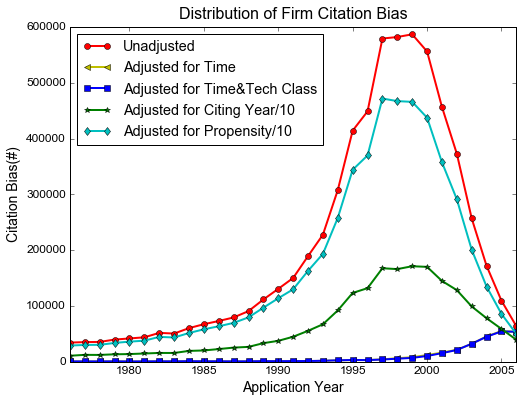

In [48]:
temp = Bias_Records[["year","#citings_bias","fyr#citings_bias","fyrfd#citings_bias","citing_ce_bias","citing_pc_bias"]].groupby("year").sum()

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Unadjusted", 
            "Adjusted for Time", "Adjusted for Time&Tech Class",
            "Adjusted for Citing Year/10", "Adjusted for Propensity/10"], loc=0)
plt.title("Distribution of Firm Citation Bias", **title_font)
plt.rc('font', **font)
fig = ax.get_figure()
fig.savefig("Distribution of Firm Citation Bias"+".png")

#### Figure B2: Firm Citation Bias (Adjusted with propensity to cite) across HJT Technology Classes

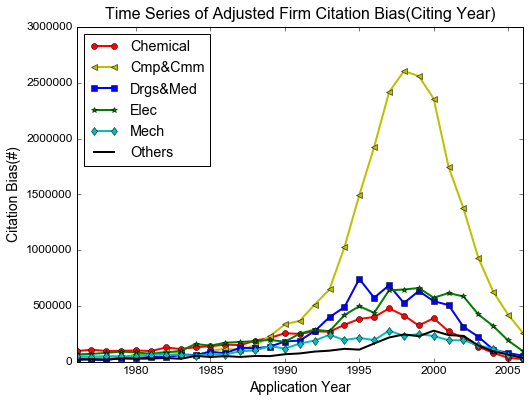

In [49]:
temp = Bias_Records[["year", "mode_class_year", "citing_pc_bias"]]
temp.citing_pc_bias = temp.citing_pc_bias*10
temp = temp[["year", "mode_class_year", "citing_pc_bias"]].pivot_table(index="year", columns="mode_class_year", values="citing_pc_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Citing Year)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Citing Year)"+".png")

#### Figure B3: Firm Citation Bias (Adjusted with propensity to cite) across Statess

C:\Users\yang6030\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


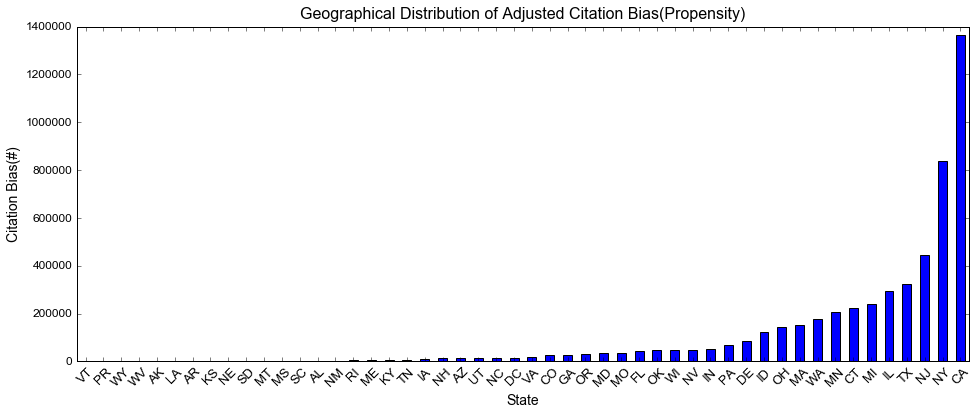

In [50]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year", "citing_pc_bias"]].groupby(["mode_state_year"]).sum().sort("citing_pc_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Citation Bias(Propensity)", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Citation Bias(Propensity)"+".png")


#### Figure D1A. Firm Patent Bias (Unadjusted and Adjusted) across Industries (SIC)

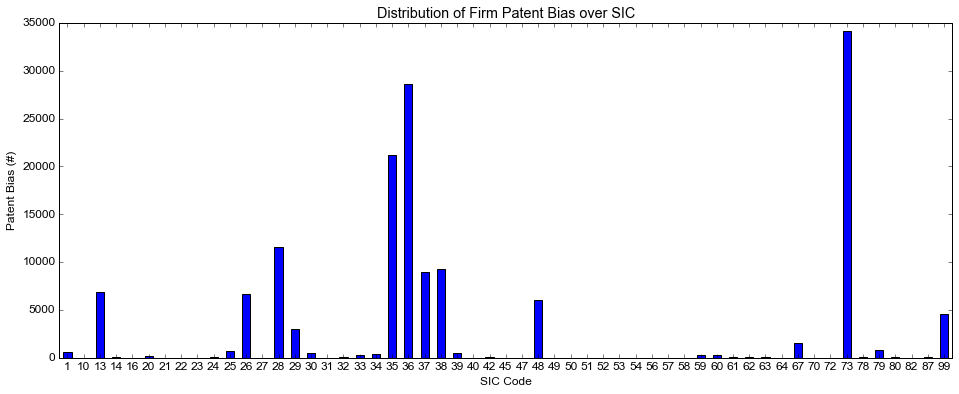

In [51]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","#patents_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Patent Bias over SIC")
plt.xlabel("SIC Code")
plt.ylabel("Patent Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Patent Bias over SIC"+".png")

#### Figure D1B. Firm Patent Bias (Unadjusted and Adjusted) across Industries (SIC)

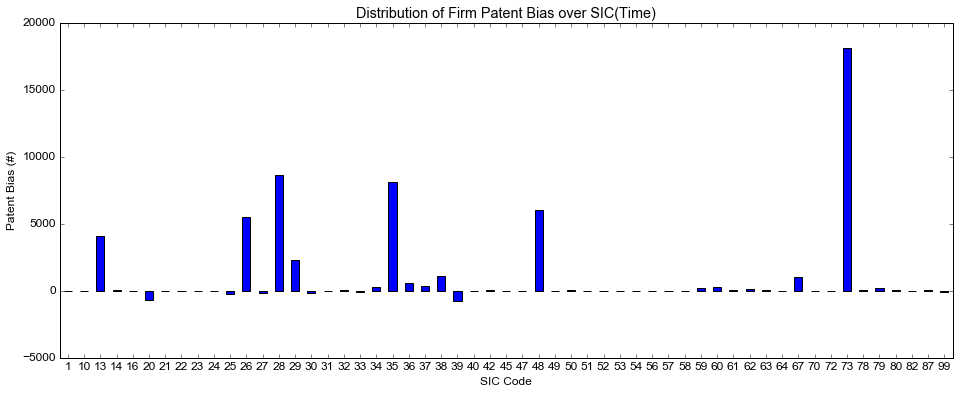

In [52]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","fyr#patents_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Patent Bias over SIC(Time)")
plt.xlabel("SIC Code")
plt.ylabel("Patent Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Patent Bias over SIC(Time)"+".png")

#### Figure D1C. Firm Patent Bias (Unadjusted and Adjusted) across Industries (SIC)

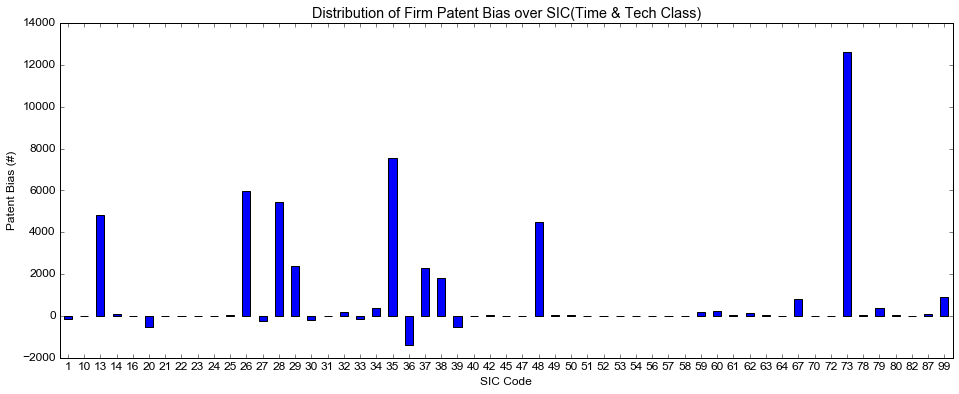

In [53]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","fyrfd#patents_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Patent Bias over SIC(Time & Tech Class)")
plt.xlabel("SIC Code")
plt.ylabel("Patent Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Patent Bias over SIC(Time & Tech Class)"+".png")

#### Figure D2A. Firm Citation Bias (Unadjusted and Adjusted) across Industries (SIC)

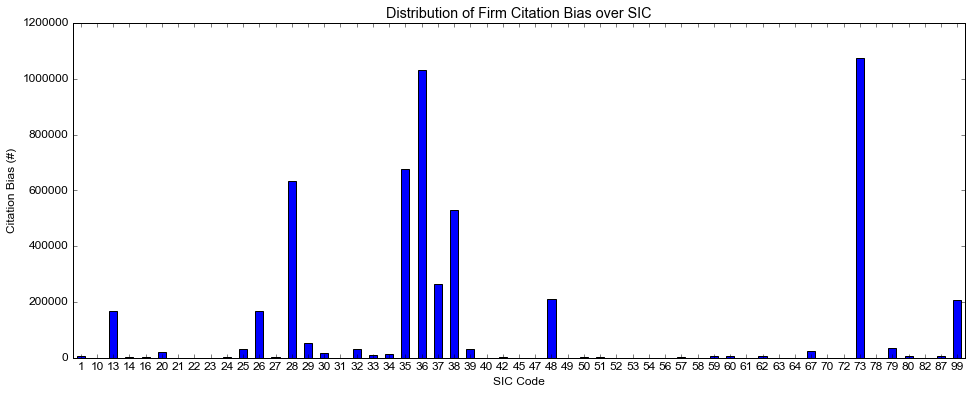

In [54]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","#citings_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias over SIC")
plt.xlabel("SIC Code")
plt.ylabel("Citation Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias over SIC"+".png")

#### Figure D2B. Firm Citation Bias (Unadjusted and Adjusted) across Industries (SIC

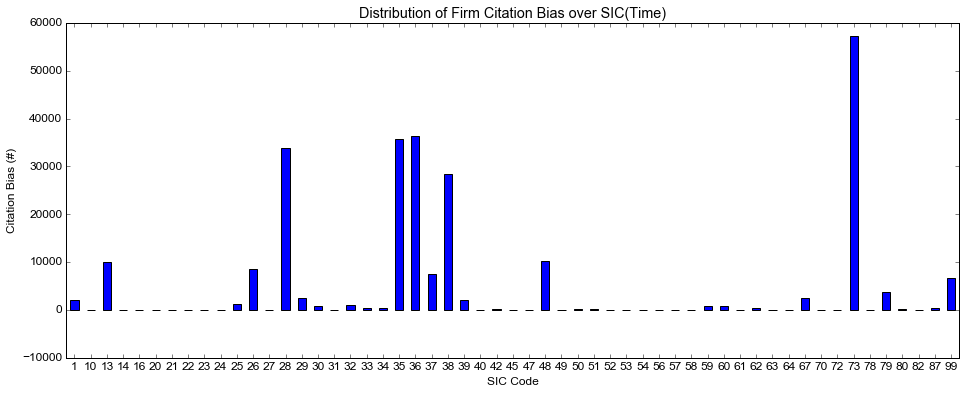

In [55]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","fyr#citings_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias over SIC(Time)")
plt.xlabel("SIC Code")
plt.ylabel("Citation Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias over SIC(Time)"+".png")

#### Figure D2C. Firm Citation Bias (Unadjusted and Adjusted) across Industries (SIC)

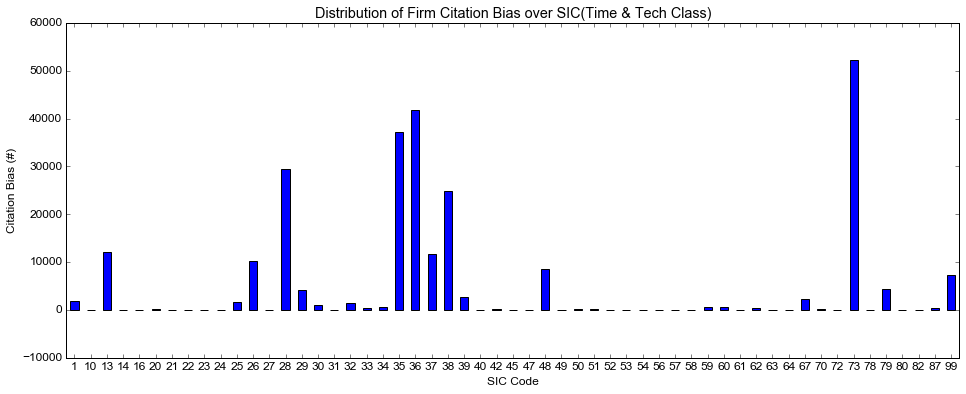

In [56]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","fyrfd#citings_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias over SIC(Time & Tech Class)")
plt.xlabel("SIC Code")
plt.ylabel("Citation Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias over SIC(Time & Tech Class)"+".png")

#### Figure D2D. Firm Citation Bias (Unadjusted and Adjusted) across Industries (SIC)

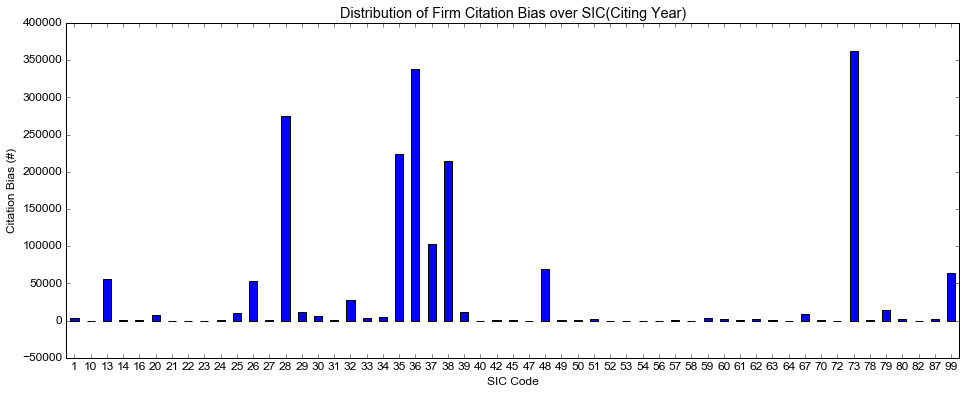

In [57]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","citing_ce_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias over SIC(Citing Year)")
plt.xlabel("SIC Code")
plt.ylabel("Citation Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias over SIC(Citing Year)"+".png")

In [58]:
Figure D2E. Firm Citation Bias (Unadjusted and Adjusted) across Industries (SIC)

SyntaxError: invalid syntax (<ipython-input-58-0397a0dec42c>, line 1)

In [ ]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["sic","citing_pc_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("sic", as_index=False).sum()
firm_class10.sic = firm_class10.sic.astype(int)

ax = firm_class10.plot(kind="bar", x="sic", figsize=[16,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias over SIC(Propensity)")
plt.xlabel("SIC Code")
plt.ylabel("Citation Bias (#)")
plt.legend(["Unadjust Patent Bias"], loc=0)
fig = ax.get_figure()
ax.legend_.remove()
fig.savefig("Distribution of Firm Citation Bias over SIC(Propensity)"+".png")

#### Figure E1A. Distribution of Firm Patent Bias and Citation Bias

In [ ]:
Bias_Records.columns

In [ ]:
temp = Bias_Records[["year","#patents_bias","fyrf#patents_bias","fyrfdf#patents_bias"]].groupby("year").sum()

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.legend(["Unadjusted", 
            "Adjusted for Time", "Adjusted for Time&Tech Class"], loc=0)
plt.title("Distribution of Firm Patent Bias", **title_font)
plt.rc('font', **font)
fig = ax.get_figure()
fig.savefig("Distribution of Firm Patent Bias(corp)"+".png")

#### Figure E1B. Distribution of Firm Patent Bias and Citation Bias

In [ ]:
temp = Bias_Records[["year","#citings_bias","fyrf#citings_bias","fyrfdf#citings_bias"]].groupby("year").sum()

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Unadjusted", 
            "Adjusted for Time", "Adjusted for Time&Tech Class"], loc=0)
plt.title("Distribution of Firm Citation Bias", **title_font)
plt.rc('font', **font)
fig = ax.get_figure()
fig.savefig("Distribution of Firm Citation Bias(corp)"+".png")

#### Figure E2A. Distribution of Firm Patent Bias and Citation Bias across Time

In [ ]:
temp = Bias_Records[["year", "mode_class_year", "fyrf#patents_bias"]]
temp = temp[["year", "mode_class_year", "fyrf#patents_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyrf#patents_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Time)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Time)(corp)"+".png")

#### Figure E2B. Distribution of Firm Patent Bias and Citation Bias across Time

In [ ]:
temp = Bias_Records[["year", "mode_class_year", "fyrfdf#patents_bias"]]
temp = temp[["year", "mode_class_year", "fyrfdf#patents_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyrfdf#patents_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Time & Tech Class)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Time & Tech Class)(corp)"+".png")

#### Figure E2C. Distribution of Firm Patent Bias and Citation Bias across Time

In [ ]:
temp = Bias_Records[["year", "mode_class_year", "fyr#citings_bias"]]
temp = temp[["year", "mode_class_year", "fyr#citings_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyr#citings_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Time)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Time)"+".png")

#### Figure E2D. Distribution of Firm Patent Bias and Citation Bias across Time

In [ ]:
temp = Bias_Records[["year", "mode_class_year", "fyr#citings_bias"]]
temp = temp[["year", "mode_class_year", "fyr#citings_bias"]].pivot_table(index="year", columns="mode_class_year", values="fyr#citings_bias", aggfunc='sum').fillna(0)

ax = temp.plot(style=["ro-","y<-","bs-","g*-","cd-","k-"], linewidth=2.0, figsize=[8,6])
plt.xlabel("Application Year", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.legend(["Chemical","Cmp&Cmm","Drgs&Med","Elec","Mech","Others"], loc=0)
plt.title("Time Series of Adjusted Firm Citation Bias(Time & Tech Class)", **title_font)
fig = ax.get_figure()
fig.savefig("Time Series of Adjusted Firm Citation Bias(Time & Tech Class)(corp)"+".png")

#### Figure E3A. Distribution of Firm Patent Bias and Citation Bias across Regions

In [ ]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year","fyrf#patents_bias","fyrfdf#patents_bias"]].groupby(["mode_state_year"]).sum().sort("fyrfdf#patents_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Patent Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Patent Bias", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
plt.legend(["Adjust for time", "Adjust for Time & Tech Class"], loc=0)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Patent Bias(corp)"+".png")

#### Figure E3B. Distribution of Firm Patent Bias and Citation Bias across Regions

In [ ]:
temp = Bias_Records[Bias_Records.mode_state_year.isin(mystate)][["mode_state_year","fyrf#citings_bias","fyrfdf#citings_bias"]].groupby(["mode_state_year"]).sum().sort("fyrfdf#citings_bias")

ax = temp.plot(kind="bar", figsize=[16,6])
plt.xlabel("State", **axis_font)
plt.ylabel("Citation Bias(#)", **axis_font)
plt.title("Geographical Distribution of Adjusted Citation Bias", **title_font)
ax.legend_.remove()
plt.xticks(rotation=45, **x_font)
plt.legend(["Adjust for time", "Adjust for Time & Tech Class"], loc=0)
fig = ax.get_figure()
fig.savefig("Geographical Distribution of Adjusted Citation Bias(corp)"+".png")

#### Figure E4A. Distribution of Firm Patent Bias and Citation Bias across Industries (NAICS)

In [ ]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","fyrf#patents_bias","fyrfdf#patents_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Patent Bias over naics")
plt.xlabel("NAICS Code")
plt.ylabel("Patent Bias (#)")
plt.legend(["Adjust for time", "Adjust for Time & Tech Class"], loc=0)
fig = ax.get_figure()

fig.savefig("Distribution of Firm Patent Bias over naics(corp)"+".png")

#### Figure E4B. Distribution of Firm Patent Bias and Citation Bias across Industries (NAICS)

In [ ]:
firm_class1 = patent_firm[(pd.isnull(patent_firm.naics)==False)][["naics","fyrf#citings_bias","fyrfdf#citings_bias"]].drop_duplicates()
firm_class10 = firm_class1.groupby("naics", as_index=False).sum()
firm_class10.naics = firm_class10.naics.astype(int)

ax = firm_class10.plot(kind="bar", x="naics", figsize=[8,6])
plt.xticks(rotation=0)
plt.title("Distribution of Firm Citation Bias over NAICS")
plt.xlabel("NAICS Code")
plt.ylabel("Citation Bias (#)")
plt.legend(["Adjust for time", "Adjust for Time & Tech Class"], loc=0)
fig = ax.get_figure()
fig.savefig("Distribution of Firm Citation Bias over naics(corp)"+".png")